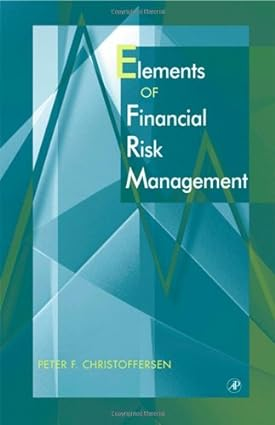

### Proprietà dei rendimenti finanziari giornalieri
- I rendimenti giornalieri presentano autocorrelazione bassa o nulla
- La distribuzione non condizionata dei rendimenti giornalieri ha valori estremi alti o bassi più frequenti di quanto non sarebbe previsto da una distribuzione normale (kurtosi maggiore di 3)
- si verifica che valori estremi negativi hanno maggiore frequenza di valori estremi positivi, perciò la distribuzione è asimmetrica (indice di asimmetria o "skew" minore di 0)
- la dimensione della volatilità dei rendimenti, misurata dalla deviazione standard, domina quella dei rendimenti
- la varianza, misurata dal quadrato dei rendimenti, presenta autocorrelazione con i valori passati
- nel mercato azionario si riscontra una relazione negativa fra rendimenti e varianza, momenti di elevata volatilità sono associati a rendimenti negativi
- allungando l'orizzonte temporale la distribuzione dei rendimenti diventa più vicina a quella normale

Fonte: Christoffersen P. (2003) Elements of Financial Risk Management, Academic Preess


In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [2]:
start = datetime.datetime(1982,12, 31)
end = datetime.datetime(2023, 12, 31)

In [3]:
SP500 = pd.read_csv('SP500.csv', index_col = 0, parse_dates = True)

In [4]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000


In [5]:
#SP500 = yf.download('^GSPC', start, end)

In [6]:
SP500['RS_Netto'] = SP500['Adj Close'].pct_change(1)

#### I rendimenti giornalieri presentano autocorrelazione bassa o nulla

In [7]:
Autocorr = []
for i in range(1,100):
    x = SP500['RS_Netto'].autocorr(lag=i)
    Autocorr.append(x)

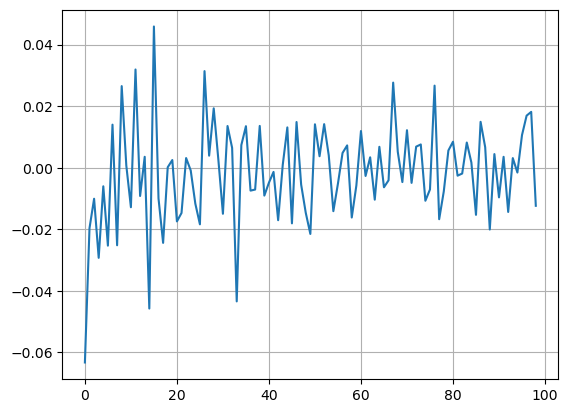

In [8]:
plt.plot(Autocorr)
plt.grid()

In [9]:
np.mean(Autocorr)

-0.001782211562497406

#### La distribuzione non condizionata dei rendimenti giornalieri ha valori estremi alti o bassi più frequenti di quanto non sarebbe previsto da una distribuzione normale (kurtosi maggiore di 3)

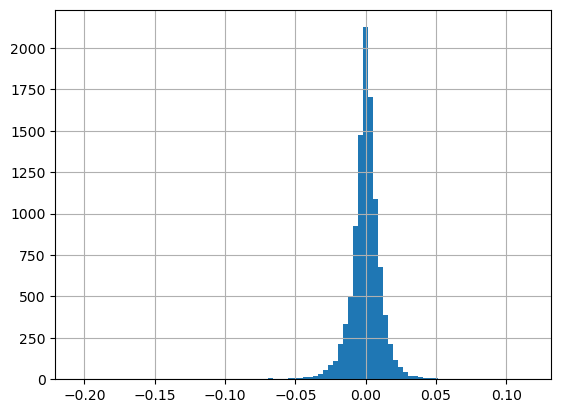

In [10]:
plt.hist(SP500['RS_Netto'], bins = 90)
plt.grid()
plt.show()

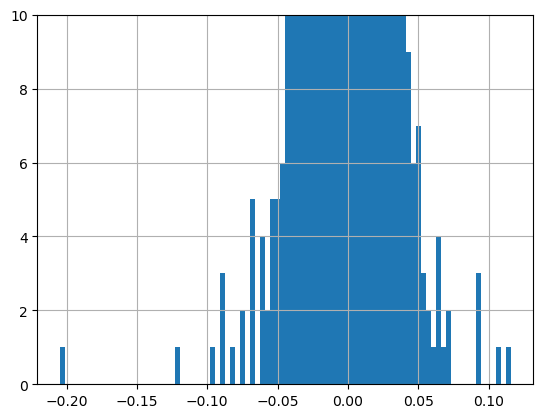

In [11]:
plt.hist(SP500['RS_Netto'], bins = 90)
plt.ylim(0,10)
plt.grid()
plt.show()

In [12]:
SP500['RS_Netto'].kurtosis(skipna = True)

19.920987332514066

In [13]:
from scipy.stats import norm

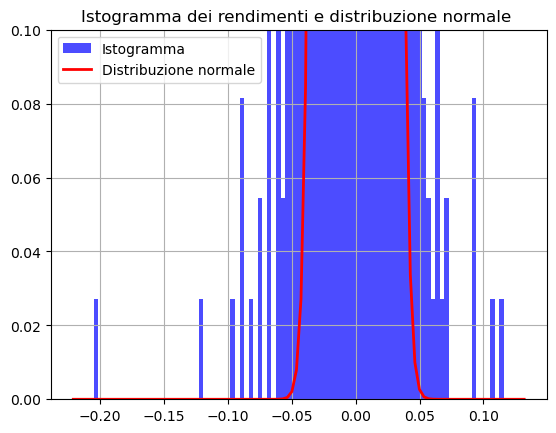

In [14]:
plt.hist(SP500['RS_Netto'], bins=90, density=True, alpha=0.7, color ='blue', label = 'Istogramma')
mu, std = np.mean(SP500['RS_Netto']), np.std(SP500['RS_Netto'])
xmin, xmax = plt.xlim()
#x = np.linspace(min(SP500['RS_Netto']),max(SP500['RS_Netto']), 100)
x = np.linspace(xmin,xmax, 100)
p = norm.pdf(x,mu,std)

plt.plot(x,p,'r',linewidth=2, label = 'Distribuzione normale')
plt.xlabel = 'Valore'
plt.ylabel = 'Frequenza'
plt.title('Istogramma dei rendimenti e distribuzione normale ')
plt.legend()
plt.grid()
plt.ylim(0,0.1)
plt.show()

#### Si verificano valori estremi negativi con maggiore frequenza di valori estremi positivi, perciò la distribuzione è asimmetrica (indice di asimmetria o "skew" minore di 0)

In [15]:
len(SP500['RS_Netto'])

10335

Numero di giorni lavorativi considerati normali in un anno

In [16]:
+len(SP500['RS_Netto'])/41


252.0731707317073

In [17]:
mu

0.00040619807265951705

In [18]:
std

0.011375325090607501

In [19]:
val_neg_estr = SP500['RS_Netto'][SP500['RS_Netto']<(mu-2.33*std)]

In [20]:
len(val_neg_estr)

170

In [21]:
len(val_neg_estr)/len(SP500['RS_Netto'])

0.01644895984518626

In [22]:
np.sum(val_neg_estr)

-6.753144548193358

In [23]:
val_pos_estr = SP500['RS_Netto'][SP500['RS_Netto']>(mu+2.33*std)]

In [24]:
len(val_pos_estr)

134

In [25]:
len(val_pos_estr)/len(SP500['RS_Netto'])

0.012965650701499758

In [26]:
np.sum(val_pos_estr)

5.378760399755001

In [27]:
SP500['RS_Netto'].skew(skipna = True)

-0.7501747167306718

#### La dimensione della volatilità dei rendimenti, misurata dalla deviazione standard, domina quella dei rendimenti

In [28]:
std/mu

28.00437977494422

Per questo motivo nei modelli di rischio a breve termine non si tiene conto del rendimento

Ma questo cambia man mano che allunghiamo l'orizzonte temporale, perché il rendimento aumenta linearmente ma la volatilità cresce con la radice quadrata del tempo

In [29]:
SP500_w = SP500.groupby(pd.Grouper(freq='W')).last() #aggregazione settimanale
SP500_w.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Netto
Date,,,,,,,
1983-01-02,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN
1983-01-09,145.270004,146.460007,145.149994,145.179993,145.179993,127290000,-0.000620
1983-01-16,145.720001,147.119995,145.720001,146.649994,146.649994,86480000,0.006313
1983-01-23,146.300003,146.300003,143.250000,143.850006,143.850006,77110000,-0.016679
1983-01-30,144.309998,145.470001,144.250000,144.509995,144.509995,89490000,0.001663


In [30]:
SP500_w['RS_Netto'] = SP500_w['Adj Close'].pct_change(1)

In [31]:
mu_w = np.mean(SP500_w['RS_Netto'])
mu_w

0.00191480961042742

In [32]:
std_w = np.std(SP500_w['RS_Netto'])
std_w

0.022961209858623724

In [33]:
std_w/mu_w

11.991380100446838

In [34]:
SP500_m = SP500.groupby(pd.Grouper(freq='M')).last() #aggregazione mensile
SP500_m.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Netto
Date,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN
1983-01-31,144.509995,145.300003,143.929993,145.300003,145.300003,67140000,0.005467
1983-02-28,149.740005,149.740005,147.809998,148.059998,148.059998,83750000,-0.011219
1983-03-31,153.410004,155.020004,152.860001,152.960007,152.960007,100570000,-0.002803
1983-04-30,162.970001,164.429993,162.720001,164.429993,164.429993,105750000,0.009083


In [35]:
SP500_m['RS_Netto'] = SP500_m['Adj Close'].pct_change(1)

In [36]:
mu_m = np.mean(SP500_m['RS_Netto'])
mu_m

0.008156658344535056

In [37]:
std_m = np.std(SP500_m['RS_Netto'])
std_m

0.043672134731731684

In [38]:
std_m/mu_m

5.354169917021463

In [39]:
SP500_q = SP500.groupby(pd.Grouper(freq='Q')).last() #aggregazione quadrimestrale
SP500_q.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Netto
Date,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN
1983-03-31,153.410004,155.020004,152.860001,152.960007,152.960007,100570000,-0.002803
1983-06-30,167.639999,167.639999,167.639999,167.639999,167.639999,76310000,0.006001
1983-09-30,167.229996,167.229996,165.630005,166.070007,166.070007,70860000,-0.006936
1983-12-31,164.860001,165.050003,164.580002,164.929993,164.929993,71840000,0.000425


In [40]:
SP500_q['RS_Netto'] = SP500_q['Adj Close'].pct_change(1)

In [41]:
mu_q = np.mean(SP500_q['RS_Netto'])
mu_q

0.024978939435316865

In [42]:
std_q = np.std(SP500_q['RS_Netto'])
std_q

0.07982764840957768

In [43]:
std_q/mu_q

3.195798148928297

In [44]:
mu_y = mu*252
mu_y

0.1023619143101983

In [45]:
std_y = std*np.sqrt(252)
std_y

0.18057768763356438

In [46]:
std_y/mu_y

1.764110107264509

#### La varianza, misurata dal quadrato dei rendimenti, presenta autocorrelazione positiva con i valori passati

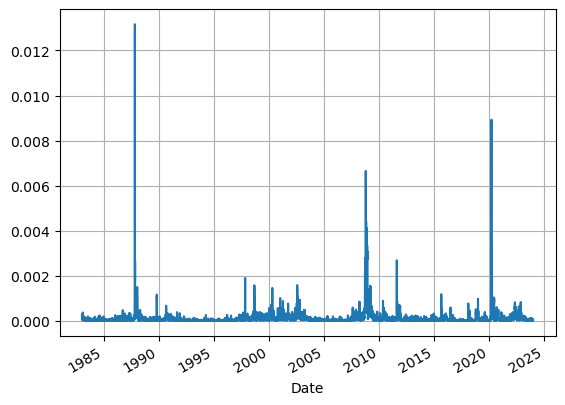

In [47]:
SP500['RS_Netto'].rolling(window=5).var().plot()
plt.grid()

In [48]:
SP500['RS_2']=SP500['RS_Netto']**2

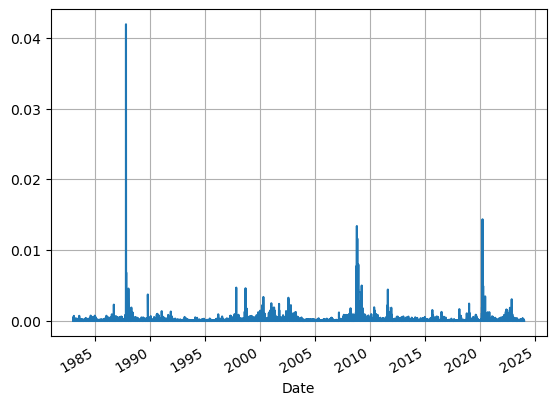

In [49]:
SP500['RS_2'].plot()
plt.ylim=(0,0.01)
plt.grid()

In [50]:
Autocorr_2 = []
for i in range(1,100):
    x = SP500['RS_2'].autocorr(lag=i)
    Autocorr_2.append(x)

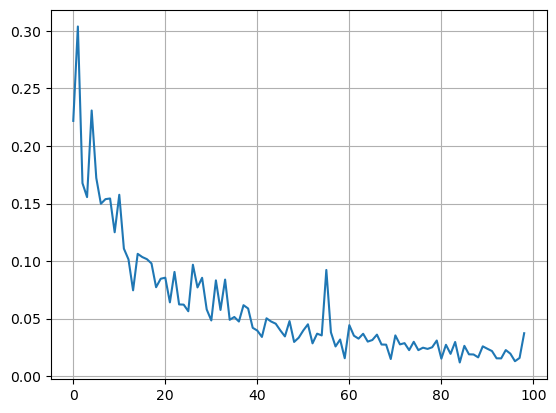

In [52]:
plt.plot(Autocorr_2)
plt.grid()